## NE 630 - Lesson 6

  - Wrap up exploration of resonances
  - Apply basic definitions for probabilities
  - Play with random numbers

# The Single-Level Breit-Wigner Approximation

Let's construct $\sigma_{\gamma}(E)$ for ${}^{238}$U around its first resonance (at $E = 6.67$ eV) using the (single-level) Breit-Wigner formula

$$
\sigma_{\gamma}(E) = \sigma_0 \frac{\Gamma_{\gamma}}{\Gamma} \left (\frac{E}{E} \right)^{1/2} \frac{1}{1+ 4(E-E_r)^2/\Gamma^2}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Er = 6.67     # resonance energy
Gn = 1.476e-3 # elastic width
Gg = 2.3e-2   # gamma width
G = Gn+Gg     # total width
lambda_0 = 4.55e-10/np.sqrt(Er)    # redcuced wavelength at E=Er
sigma_0 = 4*np.pi*lambda_0**2*Gn/G # peak value of sigma(E)

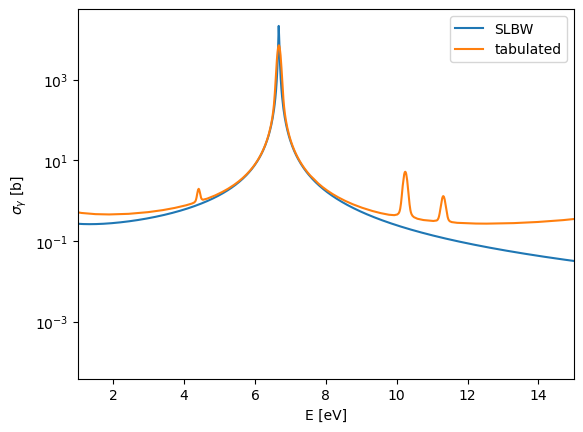

In [5]:
E = np.linspace(1, 20, 1000) # energies for plotting

# reconstruct the cross section and scale to barns
sigma_g = sigma_0 * (Gg/G)*np.sqrt(Er/E) / (1+4*(E-Er)**2/G**2)
sigma_g *= 1e24

# Load the precomputed data from last time
E_238, sig_g_238 = np.loadtxt("./cross_section_data/U238_g.txt", unpack=True, delimiter=",", skiprows=1)

plt.semilogy(E, sigma_g, label="SLBW")
plt.semilogy(E_238, sig_g_238, label="tabulated")
plt.xlim(1, 15); plt.xlabel('E [eV]'); plt.ylabel('$\sigma_{\gamma}$ [b]'); plt.legend()

Comments:

  - For constructing $\sigma_{\gamma}(E)$ with *multiple* resonances (as for HW2), use the parameters for the $i$th resonance (i.e., the $i$ row in the table) to produce $\sigma_{\gamma, i}$, and then add them together.
  - All Monte Carlo codes like MCNP, PHITS, etc., use ACE files that are similar to our tabulated data (i.e., $\sigma$ values at a bunch of energies).
  - The data provided by evaluators is in the form of resonance parameters (very similar to our SLBW parameters).
  - Tools like NJOY, PREPRO, and AMPX are needed to process the resonance parameters into the forms we use in codes.

# Probability Density Functions

A probability density function (or pdf) is any function $f(x)$ that satisfies:

  - $f(x) \geq 0$ for $a \leq x \leq b$
  - $f(x) = 0$ for $x < a$ and $x > b$
  - $\int^b_a f(x) dx = 1$
  
Such functions are used to describe random phenomena where some observable $X$ takes on a value $X=x$ or falls in a range $X \in [x, x+dx]$ (don't worry about the semantics!).

For continuous random variables, only *finite ranges* make sense, i.e, the probability that $x$ is between $x_L$ and $x_U$ is $\int^{x_U}_{x_L} f(x) dx$.

## Common (Continuous) Probability Distributions

 - uniform 
 - exponential 
 - normal (aka Gaussian)

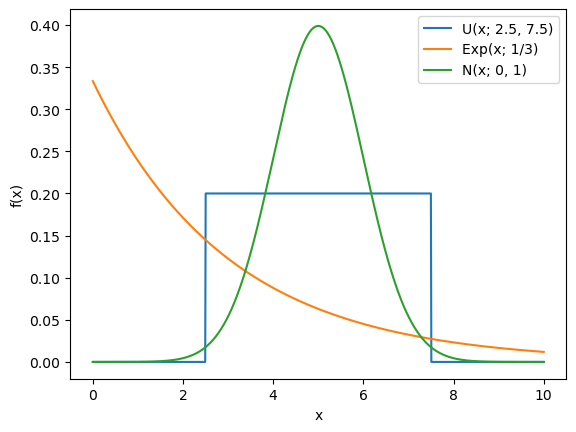

In [7]:
from scipy.stats import uniform, expon, norm
x = np.linspace(0, 10, 1000)
 
plt.plot(x, uniform.pdf(x, loc=2.5, scale=5.0), label="U(x; 2.5, 7.5)")
plt.plot(x, expon.pdf(x, loc=0.0, scale=3.0), label="Exp(x; 1/3)")
plt.plot(x, norm.pdf(x, loc=5.0, scale=1.0), label="N(x; 0, 1)")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend();

## Computing Probabilities


## Expectation Values

Given a pdf $f(x)$, the expected value of any function $g(x)$ is 

$$
  E[g(x)] = \int^{b}_{a} f(x) g(x) dx \, .
$$

What if $g(x)$ is...
  
  - $x$?  
  - $(x - E[x])^2$?
  

# Playing with Random Numbers

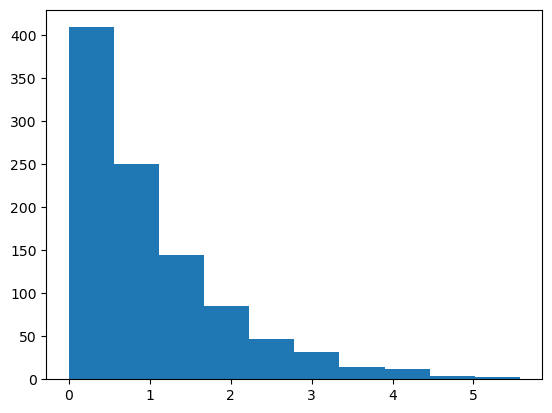

In [8]:
Sigma = 1.0
num_particles = 1000
distance = expon.rvs(scale=1/Sigma, size=num_particles)
plt.hist(distance);